In [1]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## PREPROCESSING

In [2]:
# Specify a validation split when creating ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # reserve 20% of images for validation
)
train_dir = 'C:/Users/user/Downloads/work/bharat/CAT AND DOG IMAGE CLASSIFIER/cats and dog dataset/train'

# Use 'training' subset for training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Use 'validation' subset for validation generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8065 images belonging to 2 classes.
Found 2016 images belonging to 2 classes.


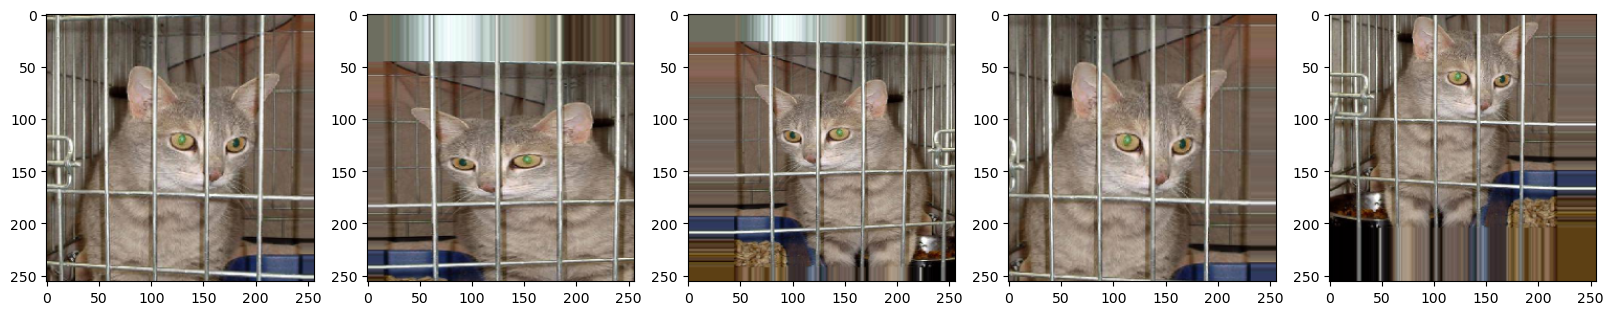

In [3]:
# Visualizing the Augmented Images
augmented_images = [train_generator[0][0][0] for i in range(5)]
augmented_images
plt.figure(figsize=(20,20))
import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(augmented_images[i])
plt.show()

## MODEL TRAINING

In [4]:
import sys
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten, Dense


# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(256,256, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
model_vgg = define_model()
model_vgg.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [6]:
history_vgg = model_vgg.fit(x = train_generator, epochs= 10 , validation_data=validation_generator)

Epoch 1/10


253/253 [==============================] - 3014s 12s/step - loss: 0.4811 - accuracy: 0.7628 - val_loss: 0.7918 - val_accuracy: 0.6290
Epoch 2/10
253/253 [==============================] - 2973s 12s/step - loss: 0.3395 - accuracy: 0.8515 - val_loss: 0.2643 - val_accuracy: 0.8869
Epoch 3/10
253/253 [==============================] - 2971s 12s/step - loss: 0.3002 - accuracy: 0.8660 - val_loss: 0.2664 - val_accuracy: 0.8879
Epoch 4/10
253/253 [==============================] - 3214s 13s/step - loss: 0.2936 - accuracy: 0.8748 - val_loss: 0.2358 - val_accuracy: 0.9018
Epoch 5/10
253/253 [==============================] - 3442s 14s/step - loss: 0.2639 - accuracy: 0.8823 - val_loss: 0.2676 - val_accuracy: 0.8785
Epoch 6/10
253/253 [==============================] - 3169s 13s/step - loss: 0.3175 - accuracy: 0.8588 - val_loss: 0.2483 - val_accuracy: 0.9038
Epoch 7/10
253/253 [==============================] - 3373s 13s/step - loss: 0.2582 - accuracy: 0.8906 - val_loss: 0.2395 - val_

In [7]:
history_vgg = model_vgg.fit(x = train_generator, epochs= 1 , validation_data=validation_generator)

253/253 [==============================] - 3085s 12s/step - loss: 0.3006 - accuracy: 0.8704 - val_loss: 0.2354 - val_accuracy: 0.9013


## SAVE MODEL

In [9]:
#model_vgg.save('model_vgg.h5')

## Testing for Single Instance 

In [12]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = 'C:\\Users\\user\\Downloads\\work\\bharat\\CAT AND DOG IMAGE CLASSIFIER\\test1\\2.jpg'
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make a prediction
result = model_vgg.predict(img_array)

# Encoding the numerical value into a category
if result[0][0] >= 0.7:  # Assuming 0.5 as the threshold
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 383ms/step
dog


## Testing for Multiple Instance 

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_and_organize_images(input_folder, output_folder_cat, output_folder_dog, threshold=0.7):
    # Create output folders if they don't exist
    os.makedirs(output_folder_cat, exist_ok=True)
    os.makedirs(output_folder_dog, exist_ok=True)

    # Iterate through each image in the input folder
    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(256, 256))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array /= 255.0  # Normalize the image

        # Make prediction
        prediction = model_vgg.predict(img_array)[0][0]

        # Classify the image as cat or dog based on the threshold
        if prediction < threshold:
            # If prediction is less than the threshold, classify as cat
            shutil.copy(img_path, os.path.join(output_folder_cat, filename))
        else:
            # If prediction is greater than or equal to the threshold, classify as dog
            shutil.copy(img_path, os.path.join(output_folder_dog, filename))

    print("Prediction and sorting complete.")

input_folder = 'C:\\Users\\user\\Downloads\\work\\bharat\\CAT AND DOG IMAGE CLASSIFIER\\cats and dog dataset\\test'
output_folder_cat = 'C:\\Users\\user\\Downloads\\work\\bharat\\CAT AND DOG IMAGE CLASSIFIER\\cats and dog dataset\\test\\cats'
output_folder_dog = 'C:\\Users\\user\\Downloads\\work\\bharat\\CAT AND DOG IMAGE CLASSIFIER\\cats and dog dataset\\test\\dogs'
classify_and_organize_images(input_folder, output_folder_cat, output_folder_dog)

Enter the path of the image: C:\Users\user\Downloads\work\bharat\BHARAT-INTERN-TASKS\CATS AND DOGS IMAGE CLASSIFICATION\dataset\test\73.jpg
1/1 [==============================] - 2s 2s/step


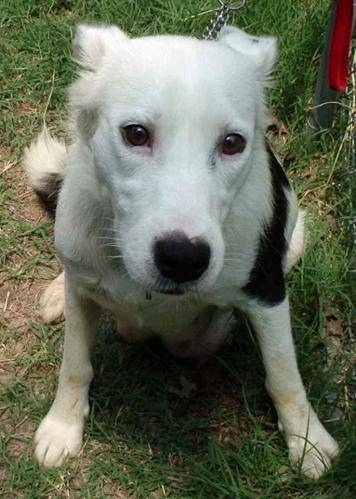

Prediction: Dog (Probability: 0.9994516372680664)


In [26]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display, Image

# Load the saved model
model = model_vgg

# Take input image path from the user
image_path = input("Enter the path of the image: ")

# Preprocess the image for model prediction
img = image.load_img(image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make predictions
prediction = model.predict(img_array)

# Decide the class based on the threshold (e.g., 0.5)
class_label = "Dog" if prediction[0][0] >= 0.5 else "Cat"

# Display the image
display(Image(filename=image_path, width=250, height=250))

# Display the prediction result
print(f"Prediction: {class_label} (Probability: {prediction[0][0]})")

## DASH

In [33]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import base64
from PIL import Image as PILImage
from io import BytesIO

# Load the saved model
model = model_vgg  # Replace with your model

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Cat/Dog Image Classification"),
    
    dcc.Upload(
        id='upload-image',
        children=[
            html.Button('Upload Image'),
            html.P("Upload an image of a cat or a dog.")
        ],
        multiple=False
    ),
    
    html.Div(id='output-image', style={'margin-top': '20px'}),
    html.Div(id='output-prediction', style={'margin-top': '20px'})
])

# Callback to update output based on uploaded image
@app.callback(
    [Output('output-image', 'children'),
     Output('output-prediction', 'children')],
    [Input('upload-image', 'contents')]
)
def update_output(contents):
    if contents is None:
        return '', ''

    # Decode the image from base64
    content_type, content_string = contents.split(',')
    decoded_image = base64.b64decode(content_string)
    
    # Load and preprocess the image
    img = PILImage.open(BytesIO(decoded_image)).resize((256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    
    # Make predictions
    prediction = model.predict(img_array)
    
    # Decide the class based on the threshold (e.g., 0.5)
    class_label = "Dog" if prediction[0][0] >= 0.5 else "Cat"
    
    # Display the image
    img_tag = html.Img(src=contents, style={'width': '250px', 'height': '250px'})
    
    # Display the prediction result
    prediction_output = html.Div([f"Prediction: It's a {class_label}!"])

    return img_tag, prediction_output

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


1/1 [==============================] - 1s 591ms/step
